In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# load the dataset
training_df = pd.read_excel('linear_selected_features.xlsx')

training_df.head()

,1887,1891,1894,1898,RWC
0,0.0935,0.0784,0.0662,0.0573,98.373025
1,0.0862,0.0731,0.0624,0.0540,99.923489
2,0.1130,0.0969,0.0831,0.0734,96.795629
3,0.0729,0.0622,0.0530,0.0455,94.518349
4,0.1016,0.0862,0.0726,0.0619,95.493562


In [3]:
# ---------------------------------
# Define predictors and target
# ---------------------------------
X = training_df.drop(columns = ['RWC'])
y = training_df['RWC']

In [4]:
# Feature scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# <font color = Orange> Multiple Linear Regression - PLSR

In [5]:
# Define the objective function for Optuna
def objective(trial):
    # Set the range for n_components to be integers between 1 and the number of features
    n_components = trial.suggest_int('n_components', 1, X_train.shape[1])
    # Set the range for max_iter to be between 100 and 1000
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Create the PLSR model with the specified hyperparameters
    model = PLSRegression(n_components=n_components, max_iter=max_iter)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the MSE of the model on the testing data
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    
    # Return mse as the objective value
    return mse

# Create the Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the number of finished trials
print("Number of finished trials: ", len(study.trials))

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the model using the best parameters
best_plsr = PLSRegression(n_components=trial.params['n_components'], max_iter=trial.params['max_iter'])

# Fit the model
best_plsr.fit(X_train, y_train)

# Make predictions
y_pred = best_plsr.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

[I 2024-03-13 14:16:05,834] A new study created in memory with name: no-name-0963a817-be69-4ea8-ad68-fdd3d27be110
[I 2024-03-13 14:16:05,849] Trial 0 finished with value: 218.39108836082187 and parameters: {'n_components': 4, 'max_iter': 518}. Best is trial 0 with value: 218.39108836082187.
[I 2024-03-13 14:16:05,881] Trial 1 finished with value: 207.42736110059224 and parameters: {'n_components': 1, 'max_iter': 624}. Best is trial 1 with value: 207.42736110059224.
[I 2024-03-13 14:16:05,935] Trial 2 finished with value: 214.91880105880526 and parameters: {'n_components': 3, 'max_iter': 716}. Best is trial 1 with value: 207.42736110059224.
[I 2024-03-13 14:16:05,954] Trial 3 finished with value: 207.42736110059224 and parameters: {'n_components': 1, 'max_iter': 771}. Best is trial 1 with value: 207.42736110059224.
[I 2024-03-13 14:16:05,981] Trial 4 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 778}. Best is trial 4 with value: 196.781716341524

[I 2024-03-13 14:16:07,571] Trial 46 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 756}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:07,616] Trial 47 finished with value: 214.91880105880526 and parameters: {'n_components': 3, 'max_iter': 991}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:07,651] Trial 48 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 869}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:07,680] Trial 49 finished with value: 207.42736110059224 and parameters: {'n_components': 1, 'max_iter': 340}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:07,716] Trial 50 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 480}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:07,764] Trial 51 finished with value: 196.78171634152483 and parameters: {'n_componen

[I 2024-03-13 14:16:09,500] Trial 92 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 381}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:09,530] Trial 93 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 402}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:09,566] Trial 94 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 363}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:09,596] Trial 95 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 323}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:09,630] Trial 96 finished with value: 196.78171634152483 and parameters: {'n_components': 2, 'max_iter': 287}. Best is trial 4 with value: 196.78171634152483.
[I 2024-03-13 14:16:09,669] Trial 97 finished with value: 196.78171634152483 and parameters: {'n_componen

Number of finished trials:  100
Best trial:
  Value: 196.78171634152483
  Params: 
    n_components: 2
    max_iter: 778
Mean Squared Error: 196.78171634152483
Root Mean Squared Error: 14.027890659023717
R-Squared value: 0.7360286700369156


In [6]:
# Get the coefficients from the trained PLSRegression model
coefficients = best_plsr.coef_.flatten()

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature coefficients with their corresponding names
feature_coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the features by absolute coefficient values
sorted_features = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top N features and their coefficients
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, coefficient in sorted_features[:top_n]:
    print(f"{feature}: {coefficient}")

Top 3 Features:
1887: 43.731544765219425
1891: -39.93246953370118
1894: -31.598515924167177


# <font color = Blue> Elastic Net

In [7]:
# Tune the hyperparameters using Optuna
def objective(trial):
    
    # Set the range for alpha to be uniform between 0.0 and 1.0, alpha is the regularization parameter
    alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
    # Set the range for l1_ratio to be uniform between 0.0 and 1.0, l1_ratio is the ElasticNet mixing parameter
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
    # Set the range for max_iter to be between 100 and 1000, max_iter is the maximum number of iterations
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    # Create the ElasticNet model with the specified hyperparameters
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Get the MSE of the model on the testing data
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    # Return mse as the objective value
    return mse

# Create the Optuna study, we maximize the objective function (the score)
# model.score() returns the coefficient of determination R^2 of the prediction 
# i.e. the percentage of the variance in the target variable that is predictable from the feature variables
study = optuna.create_study(direction='minimize', sampler = TPESampler(seed=37))
study.optimize(objective, n_trials=100)

# Print the number of finished trials
print("Number of finished trials: ", len(study.trials))

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial

# Print the value of the final trial and the best parameters
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the model using the best parameters
best_elastic_net = ElasticNet(alpha=study.best_params['alpha'], l1_ratio=study.best_params['l1_ratio'], max_iter=study.best_params['max_iter'])

# Fit the model
best_elastic_net.fit(X_train, y_train)

# Make predictions
y_pred = best_elastic_net.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

[I 2024-03-13 14:16:17,846] A new study created in memory with name: no-name-53a0d265-25f8-4512-9a1e-49e43ccbcdb8
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:17,878] Trial 0 finished with value: 277.80533500090485 and parameters: {'alpha': 0.9444966028573069, 'l1_ratio': 0.4640981743044076, 'max_iter': 273}. Best is trial 0 with value: 277.80533500090485.
/var/folders/3h/631y

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.270e+03, tolerance: 1.200e+00
  model = cd_fast.enet_coordinat

/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.853e+00, tolerance: 1.200e+00
  model = cd_fast.enet_coordinate_descent(
[I 2024-03-13 14:16:18,454] Trial 18 finished with value: 206.37400570575122 and parameters: {'alpha': 0.012044998215535157, 'l1_ratio': 0.5689245063283462, 'max_iter': 537}. Best is trial 10 with value: 206.0927464005329.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarn

[I 2024-03-13 14:16:18,856] Trial 27 finished with value: 222.42643263359486 and parameters: {'alpha': 0.17678067054394944, 'l1_ratio': 0.2660820399896552, 'max_iter': 483}. Best is trial 21 with value: 204.7876404926432.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:18,913] Trial 28 finished with value: 212.9283848831547 and parameters: {'alpha': 0.0759877543011235, 'l1_ratio'

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:19,264] Trial 36 finished with value: 216.5322261108276 and parameters: {'alpha': 0.19173788877381154, 'l1_ratio': 0.8342197212638007, 'max_iter': 354}. Best is trial 31 with value: 201.07491846207495.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:19,641] Trial 45 finished with value: 213.13577757459046 and parameters: {'alpha': 0.15205440859784333, 'l1_ratio': 0.9174311649268123, 'max_iter': 368}. Best is trial 31 with value: 201.07491846207495.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecate

[I 2024-03-13 14:16:20,038] Trial 53 finished with value: 209.17878328056298 and parameters: {'alpha': 0.09529251311218166, 'l1_ratio': 0.9876943689941643, 'max_iter': 699}. Best is trial 31 with value: 201.07491846207495.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:20,085] Trial 54 finished with value: 207.5344783269398 and parameters: {'alpha': 0.040350432772906925, 'l1_rat

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.164e+03, tolerance: 1.200e+00
  model = cd_fast.enet_coordinat

[I 2024-03-13 14:16:21,181] Trial 70 finished with value: 218.90944695420205 and parameters: {'alpha': 0.20765551508507987, 'l1_ratio': 0.7272575864379281, 'max_iter': 492}. Best is trial 55 with value: 200.78396048827884.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:21,233] Trial 71 finished with value: 208.12110048034418 and parameters: {'alpha': 0.03844252435418037, 'l1_rat

[I 2024-03-13 14:16:21,640] Trial 79 finished with value: 208.9295292155104 and parameters: {'alpha': 0.058115264787211615, 'l1_ratio': 0.846415842470292, 'max_iter': 521}. Best is trial 76 with value: 199.27378728532165.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
[I 2024-03-13 14:16:21,692] Trial 80 finished with value: 212.3094097785123 and parameters: {'alpha': 0.14828336623065677, 'l1_ratio

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+03, tolerance: 1.200e+00
  model = cd_fast.enet_coordinate_descent(
[I 2024-03-13 14:16:22,144] Trial 88 finished with value: 201.35427915543158 and parameters: {'alpha': 0.002184452634279516, 'l1_ratio': 0.70227784397634, 'max_iter': 579}. Best is trial 76 with value: 199.27378728532165.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: Futur

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/3317287144.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.901e+03, tolerance: 1.200e+00
  model = cd_fast.enet_coordinat

Number of finished trials:  100
Best trial:
  Value: 199.27378728532165
  Params: 
    alpha: 8.945305431686738e-05
    l1_ratio: 0.7982577279974846
    max_iter: 672
Mean Squared Error: 199.27378728532165
Root Mean Squared Error: 14.11643677722256
R-Squared value: 0.73268570050892


In [8]:
# Get the coefficients from the trained ElasticNet model
coefficients = best_elastic_net.coef_

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature coefficients with their corresponding names
feature_coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the features by absolute coefficient values
sorted_features = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top N features and their coefficients
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, coefficient in sorted_features[:top_n]:
    print(f"{feature}: {coefficient}")


Top 3 Features:
1891: -99.84290022028325
1887: 49.928808549958994
1898: 42.70745400592035


# <font color = Red> Non-linear Kernel Ridge Regression (KRR)

In [9]:
# Define the objective function for Optuna
def objective(trial):
    # Set the range for alpha to be uniform between 0.0 and 1.0
    alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
    # Set the range for gamma to be loguniform between 1e-6 and 1e6
    gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
    # Set the range for kernel to be categorical between 'linear' and 'rbf'
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    
    # Create the Kernel Ridge Regression model with the specified hyperparameters
    model = KernelRidge(alpha=alpha, gamma=gamma, kernel=kernel)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the MSE of the model on the testing data
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    
    # Return mse as the objective value
    return mse

# Create the Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the number of finished trials
print("Number of finished trials: ", len(study.trials))

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the model using the best parameters
best_krr = KernelRidge(alpha=trial.params['alpha'], gamma=trial.params['gamma'], kernel=trial.params['kernel'])

# Fit the model
best_krr.fit(X_train, y_train)

# Make predictions
y_pred = best_krr.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

[I 2024-03-13 14:16:42,110] A new study created in memory with name: no-name-988fe0ef-ea37-4d02-b5db-a57ea65db985
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:42,212] Trial 0 finished with value: 125.17446335226686 and parameters: {'alpha': 0.9444966028573069, 'gamma': 0.3708327584362581, 'kernel': 'rbf'}. Best is trial 0 with value: 125.17446335226686.
/var/fold

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:42,511] Trial 10 finished with value: 188.31986075861755 and parameters: {'alpha': 0.9822334069719648, 'gamma': 0.009819189785151882, 'kernel': 'rbf'}. Best is trial 0 with value: 125.17446335226686.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:42,791] Trial 20 finished with value: 436.85332789415406 and parameters: {'alpha': 0.5009791890898765, 'gamma': 7.402022198620007, 'kernel': 'rbf'}. Best is trial 16 with value: 101.56767602627895.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been d

[I 2024-03-13 14:16:43,118] Trial 29 finished with value: 90.74893382531054 and parameters: {'alpha': 0.8782372077278203, 'gamma': 0.12383779329445442, 'kernel': 'rbf'}. Best is trial 29 with value: 90.74893382531054.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:43,141] Trial 30 finished with value: 303.63138899379487 and parameters: {'alpha': 0.8467241656156831,

[I 2024-03-13 14:16:43,461] Trial 39 finished with value: 110.893715690118 and parameters: {'alpha': 0.8060758081504688, 'gamma': 0.03139238356574321, 'kernel': 'rbf'}. Best is trial 29 with value: 90.74893382531054.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:43,488] Trial 40 finished with value: 3020.5172645683474 and parameters: {'alpha': 0.28560241527628416,

[I 2024-03-13 14:16:43,710] Trial 49 finished with value: 114.46795379913902 and parameters: {'alpha': 0.8739534488625125, 'gamma': 0.026571733734054546, 'kernel': 'rbf'}. Best is trial 29 with value: 90.74893382531054.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:43,736] Trial 50 finished with value: 785.390930469365 and parameters: {'alpha': 0.827696317509715, 

[I 2024-03-13 14:16:43,994] Trial 59 finished with value: 5330.408910988085 and parameters: {'alpha': 0.5228256927328649, 'gamma': 95174.80565453926, 'kernel': 'rbf'}. Best is trial 29 with value: 90.74893382531054.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:44,024] Trial 60 finished with value: 96.60197463080817 and parameters: {'alpha': 0.996613635174386, 'ga

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:44,289] Trial 69 finished with value: 5902.754100656123 and parameters: {'alpha': 0.9477188542948665, 'gamma': 0.47975453432445186, 'kernel': 'linear'}. Best is trial 65 with value: 90.73902039849212.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has 

[I 2024-03-13 14:16:44,652] Trial 78 finished with value: 820.5257042309918 and parameters: {'alpha': 0.9277865506001717, 'gamma': 1.671418841966672e-06, 'kernel': 'rbf'}. Best is trial 65 with value: 90.73902039849212.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:44,693] Trial 79 finished with value: 496.5288616844737 and parameters: {'alpha': 0.863763622613909,

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:44,994] Trial 88 finished with value: 92.67868401863103 and parameters: {'alpha': 0.9544256579148296, 'gamma': 0.0807505548481913, 'kernel': 'rbf'}. Best is trial 86 with value: 90.53405030159725.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been

[I 2024-03-13 14:16:45,360] Trial 97 finished with value: 4925.045595160607 and parameters: {'alpha': 0.8863954654648538, 'gamma': 3532.7761182111744, 'kernel': 'rbf'}. Best is trial 86 with value: 90.53405030159725.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = trial.suggest_uniform('alpha', 0.0, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/295769073.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e6)
[I 2024-03-13 14:16:45,415] Trial 98 finished with value: 215.5903229901736 and parameters: {'alpha': 0.9282884815903529, '

Number of finished trials:  100
Best trial:
  Value: 90.53405030159725
  Params: 
    alpha: 0.9100297543074707
    gamma: 0.12243283854840485
    kernel: rbf
Mean Squared Error: 90.53405030159725
Root Mean Squared Error: 9.514938271034513
R-Squared value: 0.8785537899081005


In [10]:
# Get the dual coefficients from the trained KernelRidge model
coefficients = best_krr.dual_coef_

# Calculate the squared magnitude of coefficients (as they are signed)
squared_magnitude = np.abs(coefficients) ** 2

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature coefficients with their corresponding names
feature_coefficients_dict = dict(zip(feature_names, squared_magnitude))

# Sort the features by their squared magnitude (importance)
sorted_features = sorted(feature_coefficients_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features and their coefficients
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, magnitude in sorted_features[:top_n]:
    print(f"{feature}: {magnitude}")


Top 3 Features:
1894: 1113.18196234147
1891: 1075.1358372919067
1887: 515.7602327840442


# Principal Component Regression (PCR)

Number of components that explain at least 95% of the variance: 1


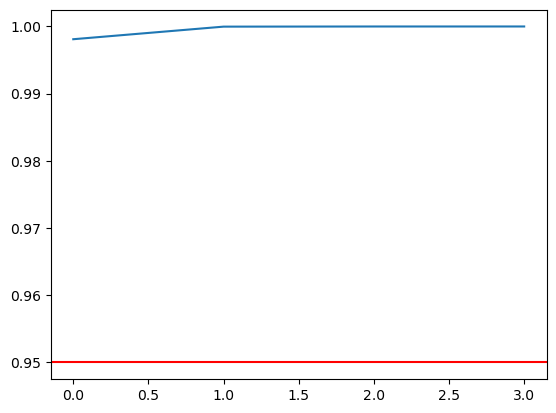

In [11]:
# Create an instance of PCA
pca = PCA(random_state= 37)

# Perform PCA on the predictors DataFrame
pca.fit(X)

# Calculate the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance with a vertical line at 95%
plt.plot(cumulative_explained_variance)
plt.axhline(y=0.95, color='r', linestyle='-')

# Find the number of components that explain at least 95% of the variance
pca_n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

print(f'Number of components that explain at least 95% of the variance: {pca_n_components}')

In [12]:
# Define the number of principal components to retain
n_components = pca_n_components

# Create a pipeline with PCA and Linear Regression
pipeline = make_pipeline(PCA(n_components), LinearRegression())

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

Mean Squared Error: 207.43652609084526
Root Mean Squared Error: 14.40265691082188
R-Squared value: 0.7217358569020287


In [13]:
# Get the principal components from the trained PCA model within the pipeline
principal_components = pipeline.named_steps['pca'].components_

# Calculate the squared loadings of each feature on the principal components
squared_loadings = principal_components ** 2

# Sum the squared loadings across principal components to get feature importance
feature_importance = squared_loadings.sum(axis=0)

# Get the names of the original features
feature_names = X.columns

# Create a dictionary to store feature importance with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features and their importance
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, importance in sorted_features[:top_n]:
    print(f"{feature}: {importance}")

Top 3 Features:
1898: 0.25197826235531035
1894: 0.2508846900896381
1891: 0.24959926762610327


# <font color = Purple> Ensemble Methods

## <font color = darkgreen> Random Forest Regression

In [14]:
# Define the objective function for Optuna
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Create the Random Forest model with the specified hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf
    )
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the MSE of the model on the testing data
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    # Return the MSE as the objective value to minimize
    return mse

# Create the Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the Random Forest model using the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=trial.params['n_estimators'], 
    max_depth=trial.params['max_depth'], 
    min_samples_split=trial.params['min_samples_split'], 
    min_samples_leaf=trial.params['min_samples_leaf']
)

# Fit the model
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

[I 2024-03-13 14:17:01,197] A new study created in memory with name: no-name-3a58902c-fc8f-4140-b30e-bbab3addda12
[I 2024-03-13 14:17:01,605] Trial 0 finished with value: 616.4287369736794 and parameters: {'n_estimators': 145, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: 616.4287369736794.
[I 2024-03-13 14:17:01,786] Trial 1 finished with value: 663.5325889324354 and parameters: {'n_estimators': 112, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 616.4287369736794.
[I 2024-03-13 14:17:01,926] Trial 2 finished with value: 600.0421853918322 and parameters: {'n_estimators': 78, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 2 with value: 600.0421853918322.
[I 2024-03-13 14:17:02,090] Trial 3 finished with value: 454.8704163184234 and parameters: {'n_estimators': 94, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 3 with value: 454.8

[I 2024-03-13 14:17:07,264] Trial 36 finished with value: 446.80862169204374 and parameters: {'n_estimators': 75, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 22 with value: 364.1841932451016.
[I 2024-03-13 14:17:07,413] Trial 37 finished with value: 565.0206933524225 and parameters: {'n_estimators': 81, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 22 with value: 364.1841932451016.
[I 2024-03-13 14:17:07,549] Trial 38 finished with value: 615.5431723679441 and parameters: {'n_estimators': 50, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 7}. Best is trial 22 with value: 364.1841932451016.
[I 2024-03-13 14:17:07,747] Trial 39 finished with value: 465.9008605788638 and parameters: {'n_estimators': 97, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 22 with value: 364.1841932451016.
[I 2024-03-13 14:17:07,923] Trial 40 finished with value: 645.9198703154681 and parameters: 

[I 2024-03-13 14:17:12,986] Trial 72 finished with value: 369.6057099061563 and parameters: {'n_estimators': 58, 'max_depth': 28, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 48 with value: 354.45432820453743.
[I 2024-03-13 14:17:13,136] Trial 73 finished with value: 413.67259302992454 and parameters: {'n_estimators': 67, 'max_depth': 28, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 48 with value: 354.45432820453743.
[I 2024-03-13 14:17:13,254] Trial 74 finished with value: 422.22902941810435 and parameters: {'n_estimators': 57, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 48 with value: 354.45432820453743.
[I 2024-03-13 14:17:13,369] Trial 75 finished with value: 395.3894005416055 and parameters: {'n_estimators': 53, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 48 with value: 354.45432820453743.
[I 2024-03-13 14:17:13,514] Trial 76 finished with value: 608.706439801724 and paramet

Best trial:
  Value: 354.45432820453743
  Params: 
    n_estimators: 50
    max_depth: 14
    min_samples_split: 15
    min_samples_leaf: 1
Mean Squared Error: 398.6017867079311
Root Mean Squared Error: 19.965014067311124
R-Squared value: 0.46529867856045903


In [15]:
# Get feature importances from the trained RandomForestRegressor model
feature_importances = best_rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature importance scores with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features and their importance scores
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, importance in sorted_features[:top_n]:
    print(f"{feature}: {importance}")

Top 3 Features:
1898: 0.3563746314181789
1894: 0.2661646662393504
1887: 0.2353811591726597


## <font color = darkgreen> Gradient Boosting Regression

In [16]:
# Define the objective function for Optuna
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 10)  # Adjust the range for max_depth
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
    
    # Create the Gradient Boosting model with the specified hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate  # Pass learning_rate to the model
    )
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the MSE of the model on the testing data
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    # Return the MSE as the objective value to minimize
    return mse

# Create the Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the Gradient Boosting model using the best parameters
best_gb_model = GradientBoostingRegressor(
    n_estimators=trial.params['n_estimators'], 
    max_depth=trial.params['max_depth'], 
    learning_rate=trial.params['learning_rate']  # Pass learning_rate to the model
)

# Fit the model
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))


[I 2024-03-13 14:17:32,304] A new study created in memory with name: no-name-f2fb165c-27c2-4d81-bed0-3d3775e5eb13
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:32,537] Trial 0 finished with value: 472.19151161060427 and parameters: {'n_estimators': 145, 'max_depth': 6, 'learning_rate': 0.027351552606144185}. Best is trial 0 with value: 472.19151161060427.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.sugg

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:34,631] Trial 14 finished with value: 424.66280011815485 and parameters: {'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.07666684614586336}. Best is trial 8 with value: 340.0118104087027.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:34,767] Trial 15 fi

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:36,383] Trial 28 finished with value: 445.30044401297323 and parameters: {'n_estimators': 130, 'max_depth': 7, 'learning_rate': 0.07181638285493064}. Best is trial 19 with value: 300.68208357510287.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:36,513] Trial 29 

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:38,100] Trial 42 finished with value: 373.3251096427177 and parameters: {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.07242904626729603}. Best is trial 19 with value: 300.68208357510287.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:38,227] Trial 43 f

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:39,769] Trial 56 finished with value: 410.1714127524198 and parameters: {'n_estimators': 123, 'max_depth': 5, 'learning_rate': 0.0676761023597052}. Best is trial 52 with value: 291.02806497688164.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:39,896] Trial 57 fi

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:41,875] Trial 70 finished with value: 350.9462033470778 and parameters: {'n_estimators': 103, 'max_depth': 5, 'learning_rate': 0.05872220035602536}. Best is trial 52 with value: 291.02806497688164.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:42,128] Trial 71 f

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:44,418] Trial 84 finished with value: 368.69990614713464 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.06494078004359777}. Best is trial 52 with value: 291.02806497688164.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:44,518] Trial 85 

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:46,417] Trial 98 finished with value: 307.15517876053804 and parameters: {'n_estimators': 135, 'max_depth': 5, 'learning_rate': 0.09276986542986353}. Best is trial 92 with value: 288.82669619176806.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/517228355.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)  # Add learning_rate hyperparameter
[I 2024-03-13 14:17:46,544] Trial 99 

Best trial:
  Value: 288.82669619176806
  Params: 
    n_estimators: 147
    max_depth: 5
    learning_rate: 0.06119330041694186
Mean Squared Error: 294.7638651923849
Root Mean Squared Error: 17.168688511135173
R-Squared value: 0.6045912650499945


In [17]:
# Get feature importances from the trained GradientBoostingRegressor model
feature_importances = best_gb_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature importance scores with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features and their importance scores
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, importance in sorted_features[:top_n]:
    print(f"{feature}: {importance}")


Top 3 Features:
1887: 0.26470922475724323
1898: 0.2636924288355393
1894: 0.24476221955939362


## <font color = green> XGBoost

In [18]:
### Define the objective function for Optuna
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    
    # Create the XGBoost model with the specified hyperparameters
    model = XGBRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Get the MSE of the model on the testing data
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    # Return the MSE as the objective value to minimize
    return mse

# Create the Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Print the best trial and save as a variable
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
# Create the XGBoost model using the best parameters
best_xgb_model = XGBRegressor(
    n_estimators=trial.params['n_estimators'], 
    max_depth=trial.params['max_depth'], 
    learning_rate=trial.params['learning_rate'],
    min_child_weight=trial.params['min_child_weight'],
    subsample=trial.params['subsample'],
    colsample_bytree=trial.params['colsample_bytree']
)

# Fit the model
best_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value:', r2_score(y_test, y_pred))

[I 2024-03-13 14:17:50,386] A new study created in memory with name: no-name-dcf064cf-4845-40ce-a525-2a945f9dd306
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

[I 2024-03-13 14:17:51,181] Trial 6 finished with value: 640.8275567851533 and parameters: {'n_estimators': 114, 'max_depth': 3, 'learning_rate': 0.08254345345232203, 'min_child_weight': 5, 'subsample': 0.5018019421849012, 'colsample_bytree': 0.7326167078381765}. Best is trial 2 with value: 549.1296350051296.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

[I 2024-03-13 14:17:52,830] Trial 19 finished with value: 626.8255450347511 and parameters: {'n_estimators': 102, 'max_depth': 9, 'learning_rate': 0.06703298621481105, 'min_child_weight': 4, 'subsample': 0.7991066974735732, 'colsample_bytree': 0.6497720932033656}. Best is trial 18 with value: 483.2194912003184.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9g

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

[I 2024-03-13 14:17:54,734] Trial 32 finished with value: 627.8312993379128 and parameters: {'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.01157436175747592, 'min_child_weight': 4, 'subsample': 0.7724441207167901, 'colsample_bytree': 0.8395388903013555}. Best is trial 18 with value: 483.2194912003184.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9g

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
[I 2024-03-13 14:17:56,737] Trial 45 finished with value: 458.4087459241637 and parameters: {'n_estimators': 125, 'max_depth': 3, 'learning_rate': 0.024240989312109596, 'min_child_weight': 2, 'subsample': 0.9482823585262112, 'colsample_bytree': 0.9185997117913318}. Best is trial 45 with value: 458.4087459241637.
/var/folders/3h/

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
[I 2024-03-13 14:17:58,936] Trial 58 finished with value: 450.6933310705257 and parameters: {'n_estimators': 135, 'max_depth': 3, 'learning_rate': 0.020254044712176913, 'min_child_weight': 2, 'subsample': 0.9375261584173469, 'colsample_bytree': 0.8906565780426663}. Best is trial 58 with value: 450.6933310705257.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/fo

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
[I 2024-03-13 14:18:00,995] Trial 71 finished with value: 447.5271934243698 and parameters: {'n_estimators': 129, 'max_depth': 3, 'learning_rate': 0.020913348372597243, 'min_child_weight': 2, 'subsample': 0.9227558696681846, 'colsample_bytree': 0.8815945689503311}. Best is trial 71 with value: 447.5271934243698.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/fo

[I 2024-03-13 14:18:02,071] Trial 77 finished with value: 474.7074031146178 and parameters: {'n_estimators': 137, 'max_depth': 4, 'learning_rate': 0.01576125800011132, 'min_child_weight': 3, 'subsample': 0.9669382465253403, 'colsample_bytree': 0.8612594809726948}. Best is trial 72 with value: 446.7218286091377.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9g

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
[I 2024-03-13 14:18:04,237] Trial 90 finished with value: 474.66824060728334 and parameters: {'n_estimators': 135, 'max_depth': 3, 'learning_rate': 0.03147658372269432, 'min_child_weight': 2, 'subsample': 0.8492228420566091, 'colsample_bytree': 0.8693481379806157}. Best is trial 81 with value: 444.3776716521004.
/var/folders/3h/

[I 2024-03-13 14:18:05,134] Trial 96 finished with value: 675.3981525997185 and parameters: {'n_estimators': 127, 'max_depth': 3, 'learning_rate': 0.09870429438502182, 'min_child_weight': 1, 'subsample': 0.8943671274220104, 'colsample_bytree': 0.9168315506767015}. Best is trial 81 with value: 444.3776716521004.
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_10855/2501454849.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
/var/folders/3h/631y9g

Best trial:
  Value: 444.3776716521004
  Params: 
    n_estimators: 138
    max_depth: 3
    learning_rate: 0.02438680839485527
    min_child_weight: 2
    subsample: 0.9526542256397068
    colsample_bytree: 0.9250337913504514
Mean Squared Error: 444.3776716521004
Root Mean Squared Error: 21.08026735248157
R-Squared value: 0.4038929674324093


In [19]:
# Get feature importances from the trained XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a dictionary to store feature importance scores with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features and their importance scores
top_n = 3  # specify the number of top features you want to display
print(f"Top {top_n} Features:")
for feature, importance in sorted_features[:top_n]:
    print(f"{feature}: {importance}")

Top 3 Features:
1894: 0.38183698058128357
1898: 0.24330011010169983
1887: 0.1960524618625641
